In [1]:
import nibabel as nib
import gzip

In [2]:
res = nib.load("/Users/gcodes/Downloads/ACDC_Dataset/training/patient001/patient001_frame01.nii.gz")
res2 = nib.load("/Users/gcodes/Downloads/ACDC_Dataset/training/patient001/patient001_frame01_gt.nii.gz")

In [3]:
res.get_fdata().shape

(216, 256, 10)

In [4]:
res.get_fdata()[0]

array([[ 0., 27.,  0., ...,  0.,  0.,  0.],
       [ 0., 31.,  0., ...,  0.,  0.,  0.],
       [ 0., 31.,  0., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

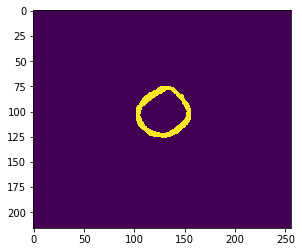

In [6]:
import matplotlib.pyplot as plt
plt.imshow((res2.get_fdata()[:,:,1] == 2).astype(int))

In [3]:
import os

In [4]:
arr = os.listdir("/Users/gcodes/Downloads/ACDC_Dataset/training/patient001/")
arr.sort()
[x.split('.')[0] for x in arr if "frame" in x and "gt" not in x]

['patient001_frame01', 'patient001_frame12']

In [32]:
frame_paths = []

In [33]:
patient_folders = ["/Users/gcodes/Downloads/ACDC_Dataset/training/patient001/"]
for patient_folder in patient_folders:
    f_arr = os.listdir(patient_folder)
    frame_names = [f for f in f_arr 
                   if "frame" in f and "gt" not in f]

In [34]:
frame_paths += frame_names

In [35]:
frame_paths

['patient001_frame01.nii.gz', 'patient001_frame12.nii.gz']

In [38]:
frame_paths[0].split('.')[0] + "_slice"

'patient001_frame01_slice'

In [19]:
for root, dirs, files in os.walk("/Users/gcodes/Downloads/ACDC_Dataset/training/patient001"):
    print(root, dirs, files)

/Users/gcodes/Downloads/ACDC_Dataset/training/patient001 [] ['Info.cfg', '.DS_Store', 'patient001_frame01.nii.gz', 'patient001_frame12.nii.gz', 'patient001_frame12_gt.nii.gz', 'patient001_frame01_gt.nii.gz', 'patient001_4d.nii.gz']


In [132]:
max(y_shape)

428

In [21]:
data_root = "/Users/gcodes/Downloads/ACDC_Dataset/training/"
[p for p in os.listdir(data_root) if "patient" in p]

['patient015',
 'patient012',
 'patient024',
 'patient023',
 'patient048',
 'patient083',
 'patient077',
 'patient070',
 'patient084',
 'patient079',
 'patient046',
 'patient041',
 'patient022',
 'patient025',
 'patient013',
 'patient014',
 'patient040',
 'patient078',
 'patient047',
 'patient085',
 'patient071',
 'patient049',
 'patient076',
 'patient082',
 'patient054',
 'patient053',
 'patient098',
 'patient091',
 'patient065',
 'patient062',
 'patient096',
 'patient009',
 'patient036',
 'patient031',
 'patient038',
 'patient007',
 'patient097',
 'patient063',
 'patient064',
 'patient090',
 'patient052',
 'patient099',
 'patient055',
 'patient001',
 'patient039',
 'patient006',
 'patient030',
 'patient008',
 'patient037',
 'patient073',
 'patient087',
 'patient080',
 'patient074',
 'patient089',
 'patient042',
 'patient045',
 'patient011',
 'patient016',
 'patient029',
 'patient020',
 'patient027',
 'patient018',
 'patient044',
 'patient088',
 'patient043',
 'patient075',
 'patient0

In [22]:
os.path.join("aa", "b")

'aa/b'

In [42]:
import numpy as np
x = np.array(dir(data_root))

In [46]:
isinstance(x, np.ndarray)

True

In [52]:
arr = np.array([['a','b'],['c','d']])

In [59]:
isinstance(arr[0,0], str)

True

In [62]:
type(np.str_)

type

In [70]:
tuple(np.roll(np.arange(3), 1))

(2, 0, 1)

In [2]:
np.arange(3)

NameError: name 'np' is not defined

In [1]:
import dataset

In [2]:
# dataset.convert_acdc_dataset("/Users/gcodes/Downloads/ACDC_Dataset/training", val_ratio=0.2)

In [3]:
import torch
ds = dataset.SimpleDataset("/Users/gcodes/Downloads/ACDC_Dataset/training/x_train.txt",
                           "/Users/gcodes/Downloads/ACDC_Dataset/training/y_train.txt")
dl = torch.utils.data.DataLoader(ds, batch_size=4)

In [4]:
import matplotlib.pyplot as plt
import numpy as np
for d in dl:
    print(d[0].shape, d[1].shape)
    plt.imshow(d[0][0], cmap='gray')
    plt.show()
    plt.imshow(d[0][0]+d[1][0]*100, cmap='gray')
    plt.show()
    break

torch.Size([4, 216, 256]) torch.Size([4, 216, 256])


<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

In [1]:
from transforms import *
import torch

In [10]:
t = PadTo2Power(axes=(1,2), k=2, pad_label=True, mode='constant', value=0)
x = torch.randn((4,80,100))
y = torch.randn((4,80,100))
data = {'image':x,'label':y}
%time res = t(data)
print(res['image'].shape)
print(res['label'].shape)

0
0
CPU times: user 154 µs, sys: 113 µs, total: 267 µs
Wall time: 175 µs
torch.Size([4, 80, 100])
torch.Size([4, 80, 100])


In [3]:
ups = torch.nn.Upsample(scale_factor=2.0)

In [12]:
x = torch.randn((4,1,100,100))
ups(x).shape

torch.Size([4, 1, 200, 200])

In [52]:
import scipy.io
mat = scipy.io.loadmat('/Users/gcodes/Downloads/BSR/BSDS500/data/groundTruth/train/12003.mat')

In [53]:
mat

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN, Created on: Thu Oct 29 09:23:31 2009',
 '__version__': '1.0',
 '__globals__': [],
 'groundTruth': array([[array([[(array([[1, 1, 1, ..., 4, 4, 4],
        [1, 1, 1, ..., 4, 4, 4],
        [1, 1, 1, ..., 4, 4, 4],
        ...,
        [1, 1, 1, ..., 6, 6, 6],
        [1, 1, 1, ..., 6, 6, 6],
        [1, 1, 1, ..., 6, 6, 6]], dtype=uint16), array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8))]],
       dtype=[('Segmentation', 'O'), ('Boundaries', 'O')]),
         array([[(array([[1, 1, 1, ..., 4, 4, 4],
        [1, 1, 1, ..., 4, 4, 4],
        [1, 1, 1, ..., 4, 4, 4],
        ...,
        [1, 1, 1, ..., 6, 6, 6],
        [1, 1, 1, ..., 6, 6, 6],
        [1, 1, 1, ..., 6, 6, 6]], dtype=uint16), array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
       

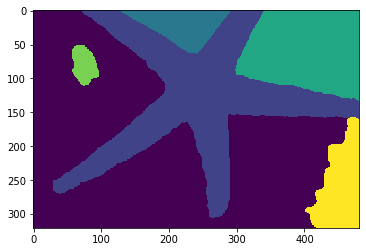

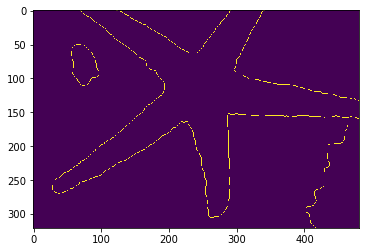

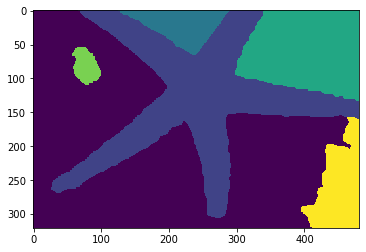

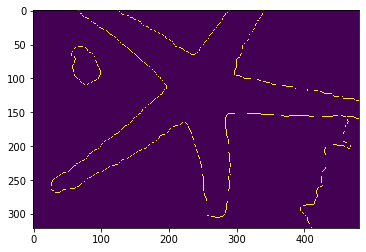

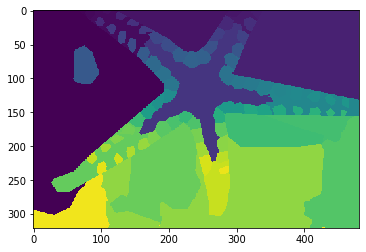

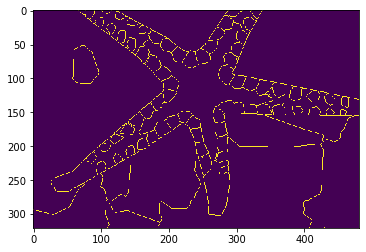

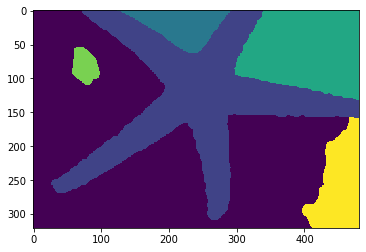

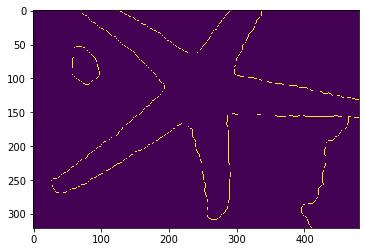

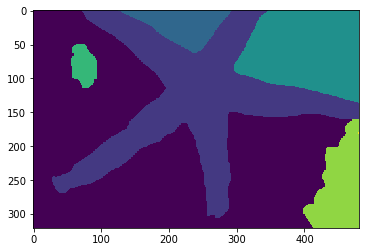

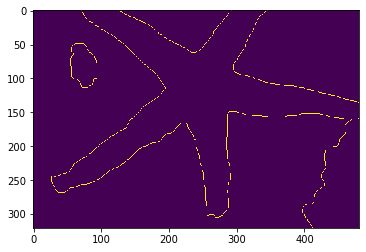

In [54]:
import matplotlib.pyplot as plt
for i in range(mat['groundTruth'].shape[1]):
    plt.imshow(mat['groundTruth'][0,i][0,0][0])
    plt.show()
    plt.imshow(mat['groundTruth'][0,i][0,0][1])
    plt.show()

In [59]:
import os
data_root = "/Users/gcodes/Downloads/BSR/BSDS500/data"
x_names_train = [f[:-4] for f in os.listdir(os.path.join(data_root, "images/train"))
                     if f.endswith(".jpg")]

In [62]:
type(mat['groundTruth'][0,0][0,0][0])

numpy.ndarray

In [61]:
os.path.join('a','b','c')

'a/b/c'

In [7]:
from dataset_maker import convert_bsds500_dataset

In [8]:
convert_bsds500_dataset("/Users/gcodes/Downloads/BSR/BSDS500/data", "bsds500")

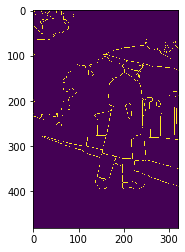

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import imageio
plt.imshow(np.load("/Users/gcodes/Downloads/BSR/BSDS500/data_p/groundTruth/test/250087/c0.npy"))
plt.show()

In [1]:
from dataset import SimpleDataset

In [2]:
ds = SimpleDataset("/Users/gcodes/Downloads/BSR/BSDS500/data_p/x_train.txt",
                   "/Users/gcodes/Downloads/BSR/BSDS500/data_p/y_s_train.txt")

In [3]:
res = ds.__getitem__(20)
print(res[0].shape, res[1].shape)

(321, 481, 3) (321, 481)


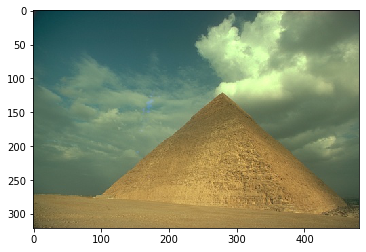

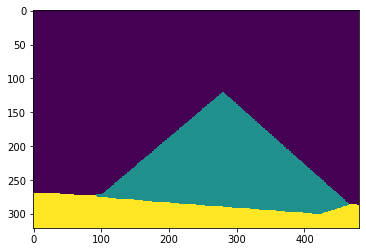

In [5]:
import numpy as np
import matplotlib.pyplot as plt
plt.imshow(res[0])
plt.show()
plt.imshow(res[1])
plt.show()

In [1]:
from dataset_maker import convert_acdc_dataset

In [2]:
convert_acdc_dataset("ACDC_Dataset/training", "ACDC_Dataset_p/training", val_ratio=0.2)